<a href="https://colab.research.google.com/github/Rohanraj1330/codsoft/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload 'IMDb Movies India.csv' now:


Saving IMDb Movies India.csv to IMDb Movies India (1).csv
Checking for 'IMDb Movies India.csv'...
'IMDb Movies India.csv' found locally. Skipping upload.

Successfully loaded 'IMDb Movies India.csv' with 'latin-1' encoding.

--- Initial DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None

--- Initial DataFrame Description ---
         Name    Year Duration  Genre       Rating Votes      Di

/tmp/ipython-input-5-2432218843.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Votes'].fillna(df['Votes'].median(), inplace=True)
/tmp/ipython-input-5-2432218843.py:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Combined actor columns into 'actors_combined'.
Genre column One-Hot Encoded (handling multi-genre entries).
Actors column Count Vectorized.
Extracted release year from 'Year' column.
Dropped 0 rows with no valid release year. Remaining shape: (7919, 134)

--- Data Cleaning and Preprocessing Complete. Final DataFrame shape: (7919, 134) ---

--- DataFrame Info After Preprocessing ---
<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Columns: 134 entries, Name to release_year
dtypes: float64(24), int64(102), object(8)
memory usage: 8.2+ MB
None

--- DataFrame Sample After Preprocessing (first 5 rows) ---
                                 Name    Year Duration  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min     7.0      8   
3                             #Yaaram  (2019)  110 min     4.4     35   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min     4.7    827   
6                           ...Yahaan  (2005)  142 min     7.4   1086   
8     

/tmp/ipython-input-5-2432218843.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[col for col in genre_features_summed.columns if col.startswith('Genre_Split_')]].fillna(0, inplace=True)


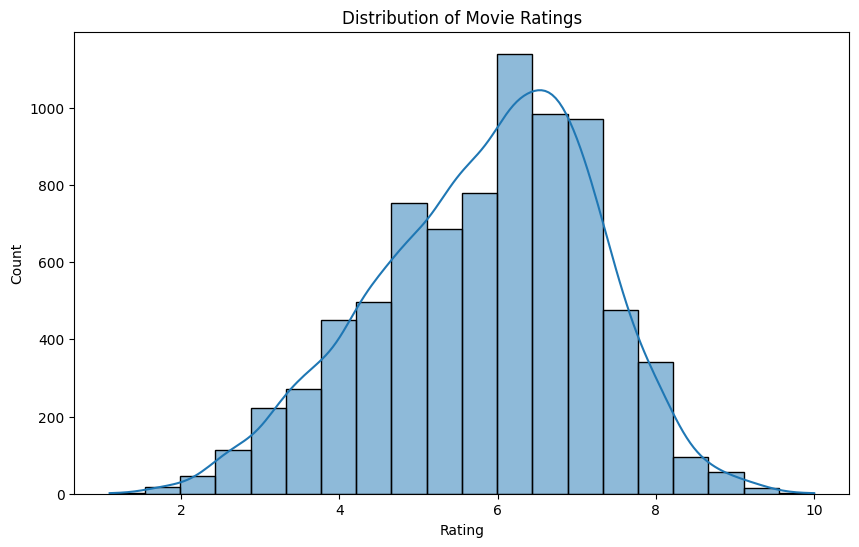

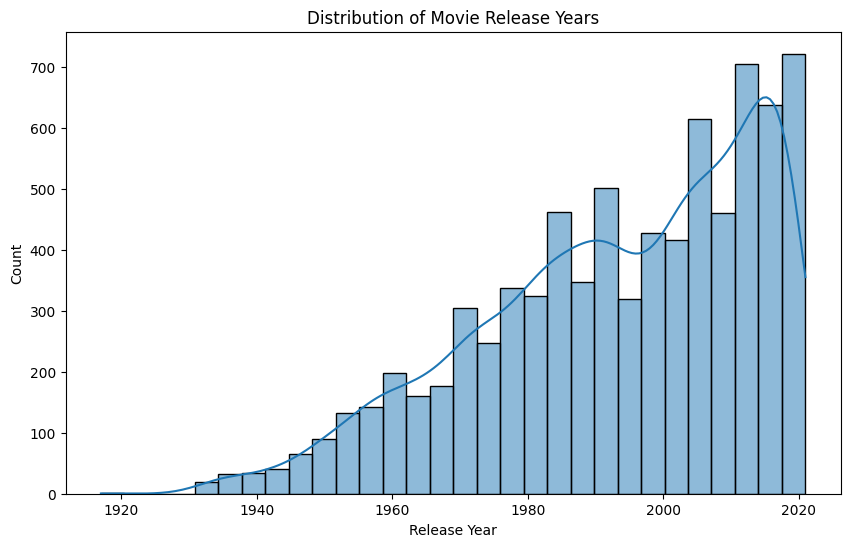

/tmp/ipython-input-5-2432218843.py:233: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reliable_genres['Genre_Name'].head(15), y=reliable_genres['average_rating'].head(15), palette='viridis')


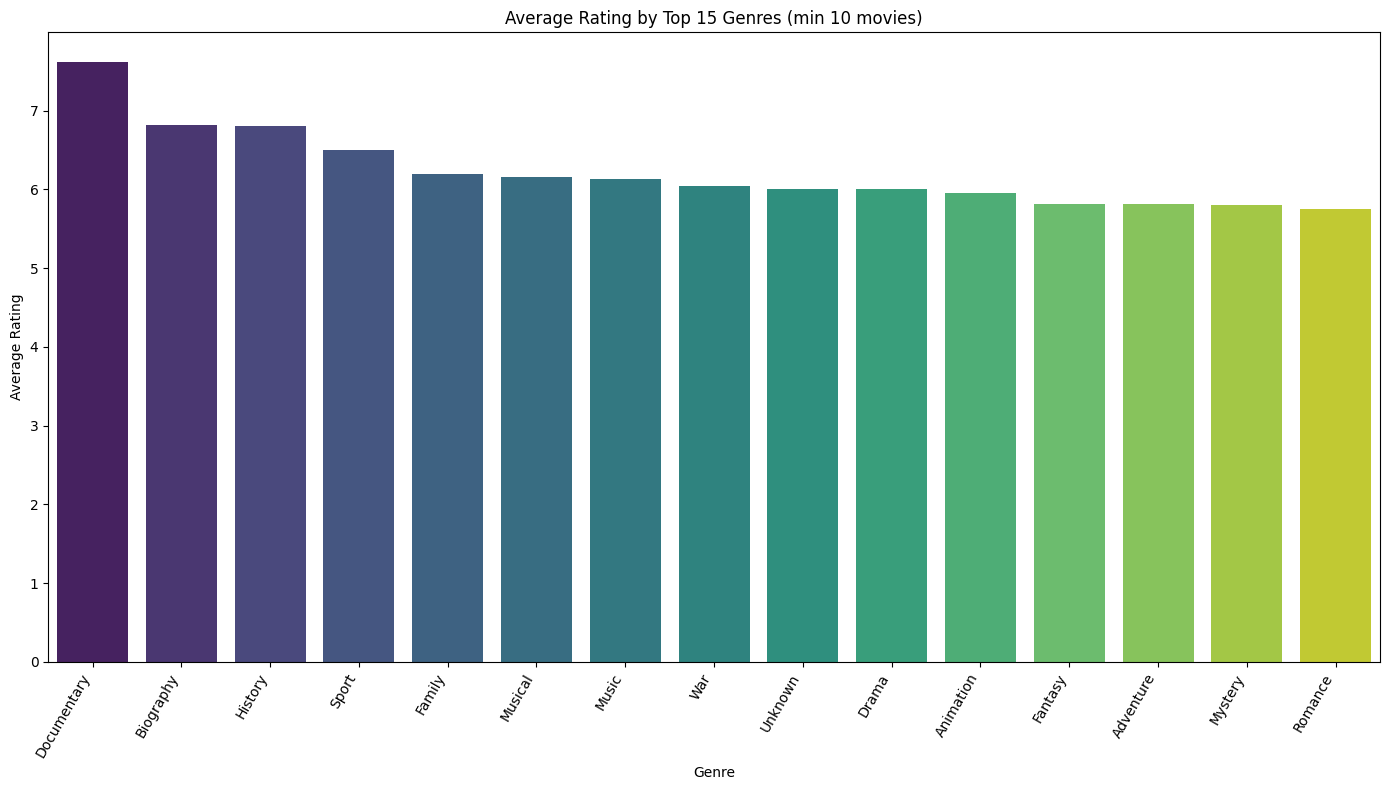

/tmp/ipython-input-5-2432218843.py:262: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors['Director'].head(15), y=top_directors['average_rating'].head(15), palette='plasma')


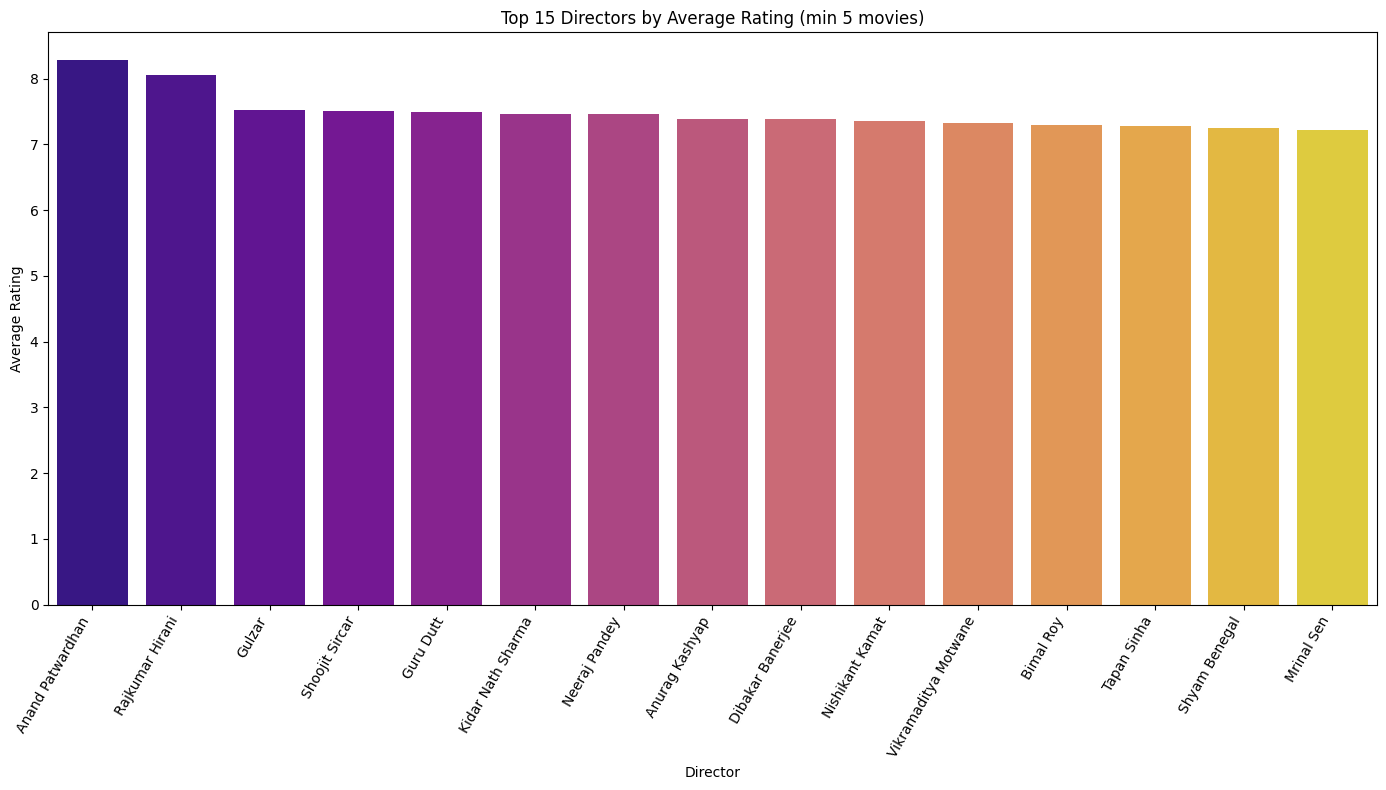

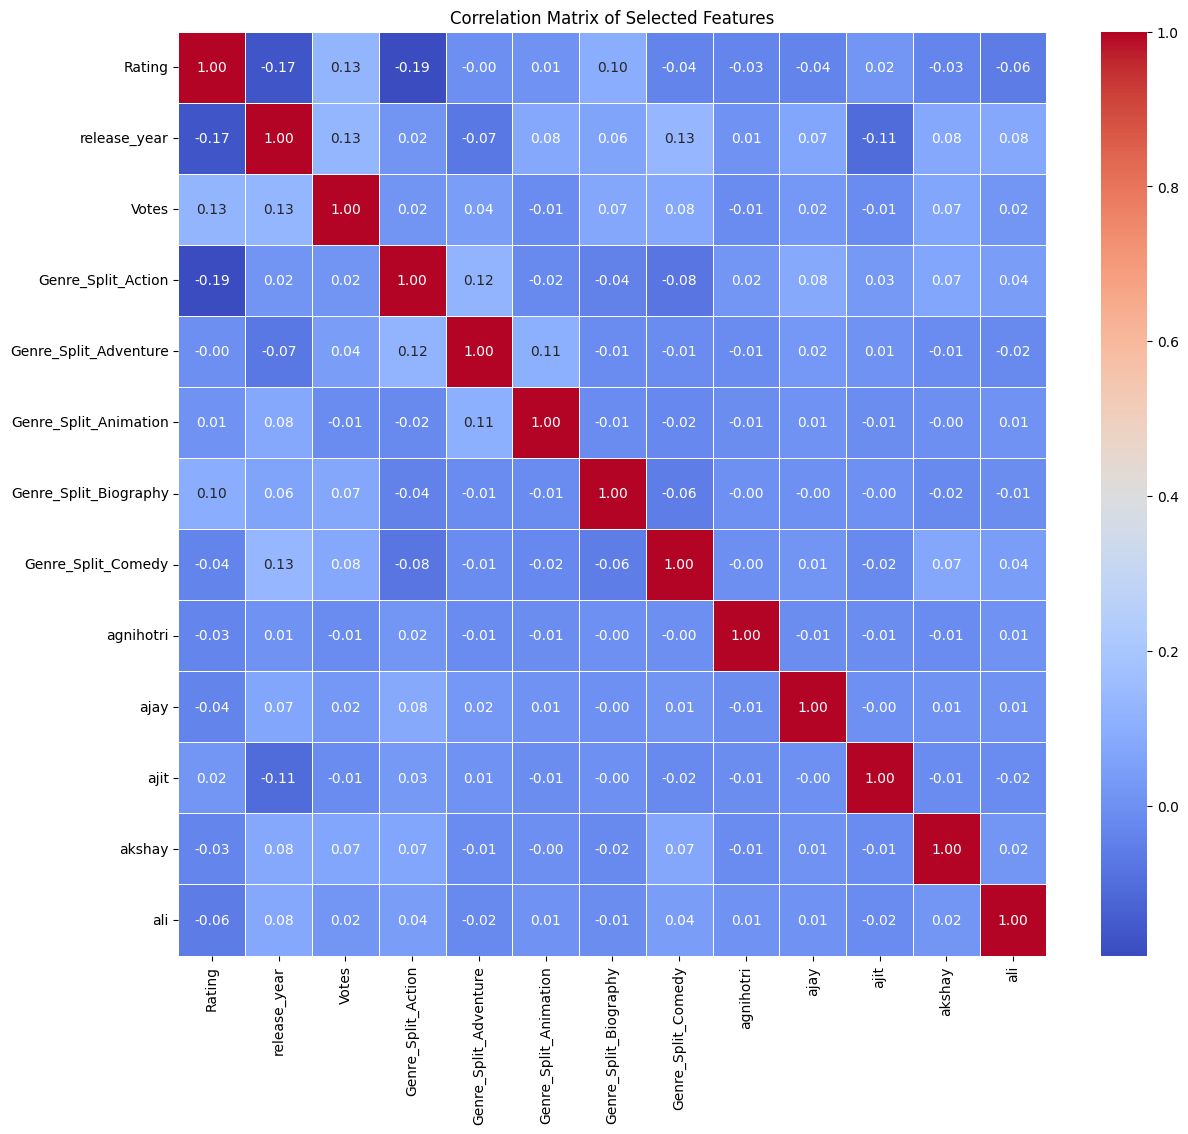


--- EDA Complete ---


In [ ]:
from google.colab import files

print("Please upload 'IMDb Movies India.csv' now:")
uploaded = files.upload()

from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import os # Import os module to check for file existence

# --- Configuration ---
FILE_NAME = "IMDb Movies India.csv"
ENCODING = 'latin-1' # Common encoding for these types of datasets

# --- File Upload and Loading ---
print(f"Checking for '{FILE_NAME}'...")
# Check if the file already exists (e.g., from a previous run or mounted Drive)
if not os.path.exists(FILE_NAME):
    print(f"'{FILE_NAME}' not found locally. Please upload it now:")
    try:
        uploaded = files.upload()
        if FILE_NAME not in uploaded:
            print(f"Error: '{FILE_NAME}' was not uploaded. Please ensure you upload the correct file.")
            print("Exiting script.")
            exit() # Exit if the file isn't uploaded
        else:
            print(f"Successfully uploaded '{FILE_NAME}'.")
    except Exception as e:
        print(f"An error occurred during file upload: {e}")
        print("Exiting script.")
        exit() # Exiting the script if upload fails
else:
    print(f"'{FILE_NAME}' found locally. Skipping upload.")

# Attempt to load the dataset
try:
    df = pd.read_csv(FILE_NAME, encoding=ENCODING)
    print(f"\nSuccessfully loaded '{FILE_NAME}' with '{ENCODING}' encoding.")
except FileNotFoundError:
    print(f"Fatal Error: '{FILE_NAME}' not found even after upload check. Please verify file existence.")
    exit()
except UnicodeDecodeError:
    print(f"Error: Could not decode '{FILE_NAME}' with '{ENCODING}' encoding. Try 'utf-8' or another encoding if available.")
    # You might try another common encoding if latin-1 fails:
    # df = pd.read_csv(FILE_NAME, encoding='utf-8')
    exit()
except Exception as e:
    print(f"An unexpected error occurred while reading the CSV file: {e}")
    exit()

# --- Initial DataFrame Info ---
print("\n--- Initial DataFrame Information ---")
print(df.info())
print("\n--- Initial DataFrame Description ---")
print(df.describe(include='all')) # include='all' to see description of non-numeric columns too

# --- Data Cleaning and Preprocessing ---
print("\n--- Starting Data Cleaning and Preprocessing ---")

# --- 1. Clean 'Rating' Column ---
if 'Rating' in df.columns:
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce') # Convert to numeric, non-convertibles become NaN
    initial_rows = df.shape[0]
    df = df.dropna(subset=['Rating']) # Drop rows where Rating is NaN
    print(f"Dropped {initial_rows - df.shape[0]} rows with missing or invalid 'Rating'. Remaining shape: {df.shape}")
else:
    print("Warning: 'Rating' column not found. Skipping rating-based cleaning.")

# --- 2. Clean 'Votes' Column ---
if 'Votes' in df.columns:
    # Remove commas and convert to numeric
    df['Votes'] = pd.to_numeric(df['Votes'].astype(str).str.replace(',', ''), errors='coerce')
    # Fill NaN 'Votes' with the median for a more robust correlation analysis later
    if df['Votes'].notna().any():
        df['Votes'].fillna(df['Votes'].median(), inplace=True)
        print("Cleaned 'Votes' column and filled missing values with median.")
    else:
        print("Warning: 'Votes' column found but contains no valid numeric data after cleaning.")
else:
    print("Warning: 'Votes' column not found. Skipping cleaning for 'Votes'.")


# --- 3. Fill Missing Categorical Values ---
categorical_cols_to_fill = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Name', 'Year', 'Duration']
for col in categorical_cols_to_fill:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)
        # print(f"Missing '{col}' values filled with 'Unknown'.") # Too verbose
    else:
        print(f"Warning: '{col}' column not found. Skipping filling missing values for it.")
print("Missing values in common categorical columns filled with 'Unknown'.")

# --- 4. Combine Actor Columns ---
actor_cols = ['Actor 1', 'Actor 2', 'Actor 3']
present_actor_cols = [col for col in actor_cols if col in df.columns]

if present_actor_cols:
    df['actors_combined'] = df[present_actor_cols].apply(
        lambda row: ', '.join(row.dropna().astype(str)), axis=1
    )
    # Replace empty strings (if all actors were 'Unknown') with actual 'Unknown' for consistency
    df['actors_combined'] = df['actors_combined'].replace('', 'Unknown')
    print("Combined actor columns into 'actors_combined'.")
else:
    print("Warning: No actor columns found (e.g., 'Actor 1', 'Actor 2', 'Actor 3'). 'actors_combined' will be empty or 'Unknown'.")
    df['actors_combined'] = 'Unknown' # Create it as 'Unknown' to avoid errors later

# --- 5. One-Hot Encoding for 'Genre' ---
if 'Genre' in df.columns and not df['Genre'].empty:
    # Handle multi-genre entries by splitting and exploding
    # Create a temporary DataFrame for one-hot encoding after exploding
    temp_df_for_genre_encoding = df.copy()
    temp_df_for_genre_encoding['Genre_Split'] = temp_df_for_genre_encoding['Genre'].str.split(', ')
    # Explode the list of genres into separate rows
    temp_df_for_genre_encoding = temp_df_for_genre_encoding.explode('Genre_Split')

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_genre_matrix = encoder.fit_transform(temp_df_for_genre_encoding[['Genre_Split']])
    genre_df_encoded = pd.DataFrame(encoded_genre_matrix,
                                    columns=encoder.get_feature_names_out(['Genre_Split']),
                                    index=temp_df_for_genre_encoding.index)

    # Sum up the one-hot encoded columns by original index to get combined genre features
    genre_features_summed = genre_df_encoded.groupby(genre_df_encoded.index).sum()

    df = df.drop(columns=['Genre']) # Drop original genre column
    df = df.merge(genre_features_summed, left_index=True, right_index=True, how='left')
    # Fill NaNs created by merge for genres (movies with no genre after explode/sum) with 0
    df[[col for col in genre_features_summed.columns if col.startswith('Genre_Split_')]].fillna(0, inplace=True)

    print("Genre column One-Hot Encoded (handling multi-genre entries).")
else:
    print("Warning: 'Genre' column not found or is empty. Skipping One-Hot Encoding for Genre.")

# --- 6. Count Vectorization for 'actors_combined' ---
if 'actors_combined' in df.columns and not df['actors_combined'].empty and not df['actors_combined'].str.strip().eq('Unknown').all():
    vectorizer = CountVectorizer(max_features=100) # Limiting features to top 100
    actors_matrix = vectorizer.fit_transform(df['actors_combined'])
    actors_df = pd.DataFrame(actors_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)
    df = pd.concat([df, actors_df], axis=1)
    print("Actors column Count Vectorized.")
else:
    print("Warning: 'actors_combined' column is empty or contains only 'Unknown'. Skipping Count Vectorization for actors.")

# --- 7. Extract Release Year ---
df['release_year'] = None # Initialize column

if 'Year' in df.columns:
    # Extract year from 'Year' column if format is like (YYYY)
    df['release_year'] = df['Year'].astype(str).str.extract(r'\((\d{4})\)')[0]
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
    print("Extracted release year from 'Year' column.")
elif 'Name' in df.columns:
    # Try to extract year from the 'Name' column if 'Year' column is not directly available
    df['release_year'] = df['Name'].astype(str).str.extract(r'\((\d{4})\)')[0]
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
    print("Extracted release year from 'Name' column.")
elif 'Release Date' in df.columns: # Less common in this specific dataset, but good to check
    df['release_year'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.year
    print("Extracted release year from 'Release Date' column.")
else:
    print("Warning: Could not find 'Year', 'Name', or 'Release Date' column to extract release year.")

# Drop rows where release_year could not be parsed and convert to integer
if 'release_year' in df.columns and df['release_year'].notna().any():
    initial_rows_year = df.shape[0]
    df = df.dropna(subset=['release_year'])
    df['release_year'] = df['release_year'].astype(int)
    print(f"Dropped {initial_rows_year - df.shape[0]} rows with no valid release year. Remaining shape: {df.shape}")
else:
    print("Skipping dropping rows with no valid release year as 'release_year' is missing or entirely NaN.")

print(f"\n--- Data Cleaning and Preprocessing Complete. Final DataFrame shape: {df.shape} ---")

print("\n--- DataFrame Info After Preprocessing ---")
print(df.info())
print("\n--- DataFrame Sample After Preprocessing (first 5 rows) ---")
print(df.head())

# --- Further Exploratory Data Analysis (EDA) ---
print("\n--- Starting Exploratory Data Analysis (EDA) ---")

# --- 1. Distribution of Movie Ratings ---
if 'Rating' in df.columns and df['Rating'].notna().any():
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Rating'], bins=20, kde=True)
    plt.title("Distribution of Movie Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()
else:
    print("\nSkipping 'Distribution of Movie Ratings' plot as 'Rating' column is missing or all NaN.")

# --- 2. Distribution of Movie Release Years ---
if 'release_year' in df.columns and df['release_year'].notna().any():
    plt.figure(figsize=(10, 6))
    sns.histplot(df['release_year'], bins=30, kde=True)
    plt.title("Distribution of Movie Release Years")
    plt.xlabel("Release Year")
    plt.ylabel("Count")
    plt.show()
else:
    print("\nSkipping 'Distribution of Movie Release Years' plot as 'release_year' column is missing or all NaN.")

# --- 3. Average Rating by Genre ---
# We need to use the original Genre column for this, after splitting it
if 'Genre_Split_Action' in df.columns and 'Rating' in df.columns and df['Rating'].notna().any(): # Check if at least one genre was encoded
    # Get all the one-hot encoded genre columns (starting with 'Genre_Split_')
    genre_feature_cols = [col for col in df.columns if col.startswith('Genre_Split_')]
    if genre_feature_cols:
        # Melt the DataFrame to get a long format for easier grouping by genre
        genre_ratings_melted = df.melt(id_vars=['Rating'], value_vars=genre_feature_cols,
                                       var_name='Encoded_Genre', value_name='Is_Present')
        # Filter to only rows where the genre is present (value is 1)
        genre_ratings_melted = genre_ratings_melted[genre_ratings_melted['Is_Present'] == 1].copy()
        # Extract the actual genre name from the encoded column name
        genre_ratings_melted['Genre_Name'] = genre_ratings_melted['Encoded_Genre'].str.replace('Genre_Split_', '')

        # Calculate average rating and movie count per genre
        genre_stats = genre_ratings_melted.groupby('Genre_Name').agg(
            average_rating=('Rating', 'mean'),
            movie_count=('Rating', 'count') # Count non-null ratings
        ).reset_index()

        min_movies_for_genre_avg = 10
        reliable_genres = genre_stats[genre_stats['movie_count'] >= min_movies_for_genre_avg].sort_values(by='average_rating', ascending=False)

        if not reliable_genres.empty:
            plt.figure(figsize=(14, 8))
            sns.barplot(x=reliable_genres['Genre_Name'].head(15), y=reliable_genres['average_rating'].head(15), palette='viridis')
            plt.title(f"Average Rating by Top 15 Genres (min {min_movies_for_genre_avg} movies)")
            plt.xlabel("Genre")
            plt.ylabel("Average Rating")
            plt.xticks(rotation=60, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"\nNot enough reliable genres (min {min_movies_for_genre_avg} movies per genre) for 'Average Rating by Top Genres' plot.")
    else:
        print("\nNo encoded genre columns found for 'Average Rating by Top Genres' plot.")
else:
    print("\nSkipping 'Average Rating by Top Genres' plot as 'Genre' or 'Rating' column is missing or invalid.")


# --- 4. Top Directors by Average Rating ---
if 'Director' in df.columns and 'Rating' in df.columns and 'Name' in df.columns and df['Rating'].notna().any():
    director_stats = df.groupby('Director').agg(
        average_rating=('Rating', 'mean'),
        movie_count=('Name', 'count')
    ).reset_index()
    min_movies_for_director_avg = 5 # Minimum movies for a director to be considered
    top_directors = director_stats[
        (director_stats['movie_count'] >= min_movies_for_director_avg) &
        (director_stats['Director'] != 'Unknown') # Exclude 'Unknown' director
    ].sort_values(by='average_rating', ascending=False)

    if not top_directors.empty:
        plt.figure(figsize=(14, 8))
        sns.barplot(x=top_directors['Director'].head(15), y=top_directors['average_rating'].head(15), palette='plasma')
        plt.title(f"Top 15 Directors by Average Rating (min {min_movies_for_director_avg} movies)")
        plt.xlabel("Director")
        plt.ylabel("Average Rating")
        plt.xticks(rotation=60, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nNot enough reliable directors (min {min_movies_for_director_avg} movies per director) for 'Top Directors by Average Rating' plot.")
else:
    print("\nSkipping 'Top Directors by Average Rating' plot as 'Director', 'Rating', or 'Name' column is missing or invalid.")

# --- 5. Correlation Matrix of Selected Features ---
if 'Rating' in df.columns and df['Rating'].notna().any():
    numerical_cols = ['Rating', 'release_year']
    if 'Votes' in df.columns and df['Votes'].notna().any():
        numerical_cols.append('Votes')

    # Select a few prominent encoded genres and actors for correlation matrix (example)
    sample_encoded_features = []

    # Get actual one-hot encoded genre columns that were added
    actual_genre_cols_added = [col for col in df.columns if col.startswith('Genre_Split_') and col != 'Genre_Split_Unknown']
    if actual_genre_cols_added:
        # Sort them and take top few or relevant ones for a readable heatmap
        sample_encoded_features.extend(sorted(actual_genre_cols_added)[:5]) # First 5 in alphabetical order

    # Get actual vectorized actor columns that were added
    actual_actor_cols_added = [col for col in df.columns if col in vectorizer.get_feature_names_out()]
    if actual_actor_cols_added:
        sample_encoded_features.extend(sorted(actual_actor_cols_added)[:5]) # First 5 in alphabetical order

    # Filter `numerical_cols` to only include those actually present in the df and are numeric
    final_numerical_cols = [col for col in numerical_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

    # Combine all selected columns for the correlation matrix
    all_corr_cols = final_numerical_cols + sample_encoded_features

    # Ensure there are columns to correlate and no all-NaN columns in the selection
    correlation_df = df[all_corr_cols].copy()
    correlation_df = correlation_df.dropna(axis=1, how='all') # Drop columns that are entirely NaN
    correlation_df = correlation_df.dropna() # Drop rows with NaNs for correlation calculation

    if not correlation_df.empty and len(correlation_df.columns) > 1:
        plt.figure(figsize=(14, 12))
        sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title("Correlation Matrix of Selected Features")
        plt.show()
    else:
        print("\nNot enough data or features for correlation matrix after selecting features and dropping NaNs.")
else:
    print("\nSkipping 'Correlation Matrix' plot as 'Rating' column is missing or invalid.")

print("\n--- EDA Complete ---")
